# Scraping glassdoor to get salary data and compare salaries of different professions

Importing relevant libraries 

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from dotenv import load_dotenv
import os
import time
import requests
from bs4 import BeautifulSoup

Setting headers

In [2]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

# Using selenium to launch web driver log in

In [3]:
def Login_to_Glassdoor():
    
    glassdoor_url = 'https://www.glassdoor.com/profile/login_input.htm'
    
    #Loading credentials from .env file
    load_dotenv()
    EMAIL = os.environ['EMAIL']
    PASSWORD = os.environ['PASSWORD']
    
    driver = webdriver.Chrome()
    driver.get(glassdoor_url)
    time.sleep(1)
    
    #using selenium webdriver to login to glassdoor with the credentials
    
    email_field = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.NAME,('username'))))
    email_field.send_keys(EMAIL)
    time.sleep(1)
    
    continue_with_email_button = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.NAME,('submit'))))
    continue_with_email_button.click()
    time.sleep(1)
    
    password_field = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.NAME,('password'))))
    password_field.send_keys(PASSWORD)
    time.sleep(1)
    
    login_button = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.NAME,('submit'))))
    login_button.click()
    time.sleep(15)
    
    return driver

# Function to get salaries for a job in a certain location

Writes data to pandas dataframe

initialising dataframe

In [4]:
import pandas as pd
df = pd.DataFrame(columns=['Title', 'Job', 'Average Salary ($/yr)']) 

In [5]:

def Get_Salaries(job , location, driver):

    salaries_url = 'https://www.glassdoor.com/Salaries/index.htm'

    driver.get(salaries_url)
    time.sleep(5)


    job_field = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.NAME,('typedKeyword'))))
    job_field.send_keys(job)
    time.sleep(1)

    location_field = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.NAME,('Autocomplete'))))
    location_field.send_keys(Keys.CONTROL + "a")
    location_field.send_keys(Keys.DELETE)
    location_field.send_keys(location)
    time.sleep(1)

    search_button = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,('//*[@id="SrchHero"]/div[1]/div/div/div/form/div/button'))))
    search_button.click()

    time.sleep(5)
    
    #using beautiful soup to get page data
    
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, "html.parser")
    data_table = soup.find_all('table')[3]
    rows = data_table.find_all('tr')
    

    for row in rows:
        if rows[0] != row:
            job_title = row.find_all('td')[0].text
            average_salary = row.find_all('td')[1].text

            row_data = [job_title, job, average_salary]

            df.loc[len(df)] = row_data
            
    


# Initialising Job list and location and calling the functions

In [6]:
location ='New York State, US'
Jobs = ['data scientist', 'data analyst', 'data engineer']

# Getting Salaries of Data Analysts, Data Scientists and Data Engineers

In [7]:
driver = Login_to_Glassdoor()

In [8]:
for job in Jobs:
    Get_Salaries(job , location, driver )
    

# Displaying the final pandas dataframe

In [9]:
df

,Title,Job,Average Salary ($/yr)
0,"Meta Data Scientist salaries - 1,513 salaries ...",data scientist,"$231,744/yr"
1,Ascendum Solutions Data Scientist salaries - 6...,data scientist,"$110,757/yr"
2,IBM Data Scientist salaries - 588 salaries rep...,data scientist,"$140,619/yr"
3,Google Data Scientist salaries - 545 salaries ...,data scientist,"$233,727/yr"
4,Amazon Data Scientist salaries - 532 salaries ...,data scientist,"$202,119/yr"
5,"Quora, Inc. Data Scientist salaries - 514 sala...",data scientist,"$153,548/yr"
6,Oracle Data Scientist salaries - 496 salaries ...,data scientist,"$187,332/yr"
7,Expedia Group Data Scientist salaries - 427 sa...,data scientist,"$178,037/yr"
8,Microsoft Data Scientist salaries - 419 salari...,data scientist,"$201,231/yr"
9,Booz Allen Hamilton Data Scientist salaries - ...,data scientist,"$109,601/yr"


# Visualizing the data and looking at the average salaries

Some data cleaning for salaries column

In [10]:
import numpy as np
import matplotlib.pyplot as plt
salaries_column = df['Average Salary ($/yr)']

def clean_column(element):
  
    import re
    result = int(re.sub(r'[^0-9]', '', element))
    
    return result

In [11]:
new_salaries_column = salaries_column.apply(clean_column)
df['Average Salary ($/yr)'] = new_salaries_column
df

,Title,Job,Average Salary ($/yr)
0,"Meta Data Scientist salaries - 1,513 salaries ...",data scientist,231744
1,Ascendum Solutions Data Scientist salaries - 6...,data scientist,110757
2,IBM Data Scientist salaries - 588 salaries rep...,data scientist,140619
3,Google Data Scientist salaries - 545 salaries ...,data scientist,233727
4,Amazon Data Scientist salaries - 532 salaries ...,data scientist,202119
5,"Quora, Inc. Data Scientist salaries - 514 sala...",data scientist,153548
6,Oracle Data Scientist salaries - 496 salaries ...,data scientist,187332
7,Expedia Group Data Scientist salaries - 427 sa...,data scientist,178037
8,Microsoft Data Scientist salaries - 419 salari...,data scientist,201231
9,Booz Allen Hamilton Data Scientist salaries - ...,data scientist,109601


# Data Summary, comparing salaries of each profession

,Job,"Mean Salaryjob,",Maximum Salary ($/yr),Minimum Salary ($/yr)
0,data scientist,176191,233727,109601
1,data analyst,92385,140638,36
2,data engineer,136509,226760,95111


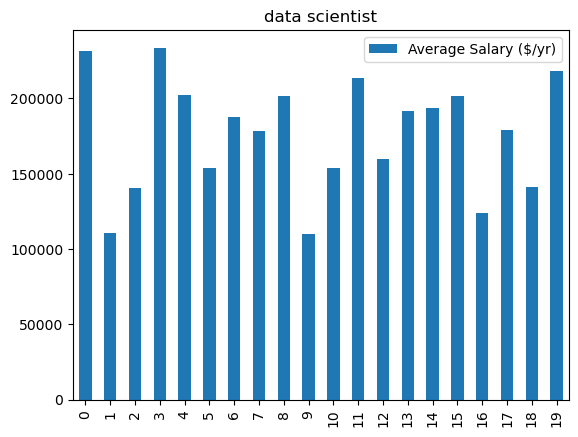

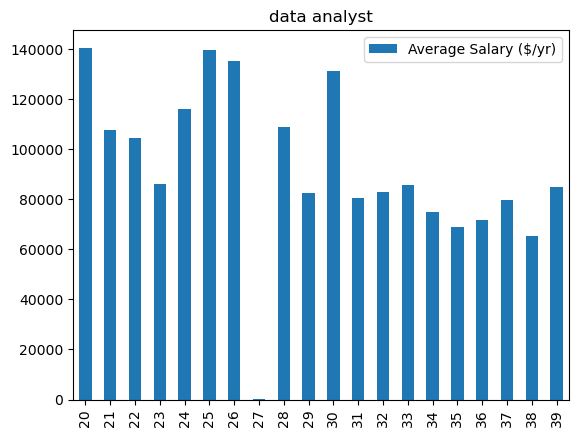

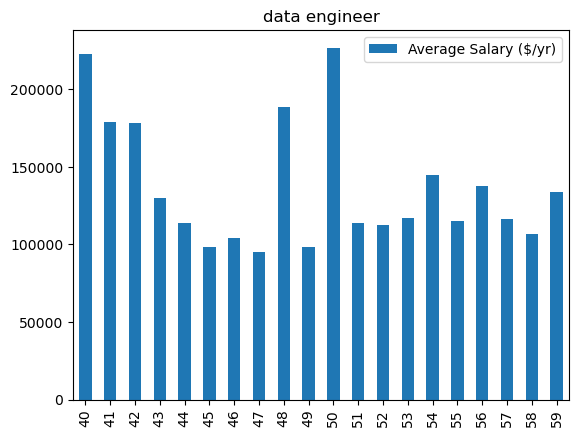

In [18]:

data_summary = pd.DataFrame(columns=['Job', 'Mean Salaryjob,', 'Maximum Salary ($/yr)',' Minimum Salary ($/yr)'])

for job in Jobs:
    
    temp_df = df[(df["Job"] == job) ]
    
    mean_salary = int(temp_df.mean(numeric_only=True))
    max_salary = int(temp_df.max(numeric_only=True))
    min_salary = int(temp_df.min(numeric_only=True))
    
    temp_df.plot(kind = 'bar' , title=job)
    
    row_data = [job,mean_salary, max_salary, min_salary]
    data_summary.loc[len(data_summary)] = row_data
    
data_summary

# Exporting the data as csv file 

In [13]:
df.to_csv('salaries.csv',index=False)

# Shutting down webdriver

In [14]:
driver.quit()